# <center>Flux plots and fits <center>

In [1]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
plt.rcParams['font.size'] = 17.0
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['font.family'] = 'serif'
from IPython.display import display, Math
import astropy as atp
from astropy import units as u
from astropy.table import QTable
from astropy.time import TimeMJD, Time, TimeString
import pylab
plt.rcParams['font.family'] = 'serif'
#plt.style.use('seaborn-whitegrid')

### Part 1: Importing data

In [2]:
data_total=pd.read_csv('FluxData2_total.csv',sep=',',engine='python')
data_both=pd.read_csv('FluxData2_both.csv',sep=',',engine='python')
#MOS=pd.read_csv('FluxDataMOS_pn.csv',sep=',',engine='python')

In [3]:
df= pd.read_csv('curve_plain.dat', sep='\s+',comment='!', engine='python',header=None) 
upperlimits=pd.read_csv('upper.dat', sep='\s+',comment='!', engine='python',header=None) 

In [4]:
headers = ["time", "time error (+ve)", "time error (-ve)", "source count-rate","source error(+)", "source error (-)","ObsID"]
df.columns = headers
upperlimits.columns=headers

In [5]:
data_total

,ObsID,N(10^22),N error +,N error -,Flux,Flux error(+),Flux error(-),Th,Th error(+),Th error(-),Th norm,Th norm error(+),Th norm error(-),Tl,Tl error(+),Tl error(-),norm,chi
0,840990101,0.071510,0.035439,-0.024996,-12.5339,0.014759,-0.015187,1.10063,0.104337,-0.077395,0.011010,0.024984,-0.007645,0.294903,0.107466,-0.065464,0.639627,"1,06224409448819"
1,861600101,0.073448,0.009978,-0.008845,-12.2440,0.009978,-0.007705,1.31141,0.098615,-0.083652,0.007553,0.002106,-0.001633,0.319385,0.023278,-0.022103,2.293600,"1,01167364016736"
2,804670201,0.095820,0.027285,-0.028644,-12.7251,0.027285,-0.028644,1.16554,0.552039,-0.203952,0.004976,0.015733,-0.003886,0.267258,0.145033,-0.074706,1.246480,"0,688613861386139"
3,804670301,0.062585,0.021673,-0.016317,-12.7213,0.015345,-0.015820,1.36925,0.460102,-0.226357,0.002177,0.001993,-0.001237,0.442303,0.108024,-0.099944,0.154352,"1,26445887445887"
4,804670401,0.102959,0.070942,-0.047070,-12.6384,0.018426,-0.019118,1.09911,0.140376,-0.094532,0.008424,0.033616,-0.006702,0.247941,0.120342,-0.059491,1.591310,"0,987388535031847"
5,804670501,0.052312,0.023476,-0.023126,-12.5987,0.018052,-0.018729,1.03895,0.078284,-0.071137,0.011963,0.040533,-0.006675,0.306613,0.000000,0.000000,0.251875,"0,867796610169492"
6,804670601,0.139948,0.062141,-0.049597,-12.4858,0.015742,-0.016244,1.09388,0.078156,-0.067062,0.013179,0.040842,-0.009346,0.200776,0.056971,-0.033128,6.946410,"1,03276381909548"
7,823410401,0.073359,0.021441,-0.015960,-11.8164,0.009046,-0.009246,1.55197,0.110786,-0.079146,0.016172,0.023326,-0.009885,0.372188,0.121186,-0.077663,0.832328,"0,972869565217391"
8,804670701,0.057390,0.034999,-0.022396,-12.4929,0.020267,-0.021133,1.44115,0.743681,-0.245389,0.003728,0.005146,-0.002105,0.396514,0.177399,-0.118965,0.297945,"0,943165467625899"
9,823410301,0.040319,0.034420,-0.021376,-12.3228,0.021726,-0.022721,1.15480,0.574939,-0.188453,0.011173,0.016191,-0.006911,0.356589,0.146481,-0.095449,0.800386,"0,992053571428571"


### Part 2: Fitting data to Stefan-Boltzmann law

 **Now, we know that the flux is related to the luminosity as:**
### $F=\frac{L}{4 \pi R^2}$
**and we want to see if it follows this relation: (it's the same with both of them)**
### $L=4 \pi R^2 \sigma T^4$ ; $F=\sigma T^4$
**where**
### $σ ≈ 5.67037441918442945397×10^{-5}  erg⋅cm^{-2}⋅s^{-1}⋅K^{-4}$

- High T disk flux

In [6]:
#Fit 1
x1=np.linspace(1,2.5,10000)

def func(x, A):
    return A*x**4

params, covs = curve_fit(func,data_both['Th'],10**data_both['Flux_h'])
A = params[0] #stefan-boltzmann constant?
yfit1 = A*x1**4

print('σ =', A)

σ = 3.536597223711582e-14


In [7]:
#Fit 2
x1=np.linspace(1,2.5,10000)

def func(x, B):
    return B*x**2

params, covs = curve_fit(func,data_both['Th'],10**data_both['Flux_h'])
B = params[0] #boltzmann constant
yfit3 = B*x1**2

print('B =', B)

B = 1.742214655121461e-13


- High T disk flux without X3

In [8]:
wX3_both=data_both.drop(11)

In [9]:
#Fit 1
x1=np.linspace(0.8,2.5,10000)

def func(x, A):
    return A*x**4

params, covs = curve_fit(func,wX3_both['Th'],10**wX3_both['Flux_h'])
A = params[0] #stefan-boltzmann constant?
yfitx3 = A*x1**4

print('σ =', A)

σ = 1.2155337295348885e-13


In [10]:
#Fit 1
x1=np.linspace(0.8,2.5,10000)

def func(x, B):
    return B*x**2

params, covs = curve_fit(func,wX3_both['Th'],10**wX3_both['Flux_h'])
B = params[0] #stefan-boltzmann constant?
yfit2x3 = B*x1**2

print('σ =', A)

σ = 1.2155337295348885e-13


- Low T disk flux

In [11]:
#Fit 1
x2=np.linspace(0.1,0.8,10000)

def func(x, A):
    return A*x**4

params, covs = curve_fit(func,data_both['Tl'],10**data_both['Flux_l'])
A = params[0] #stefan-boltzmann constant?
yfit2 = A*x2**4

print('σ =', A)

σ = 8.227730268741383e-12


In [12]:
#Fit 2
x2=np.linspace(0.1,0.8,10000)

def func(x, B):
    return B*x**2

params, covs = curve_fit(func,data_both['Tl'],10**data_both['Flux_l'])
B = params[0] #boltzmann constant
yfit4 = B*x2**2

print('B =', B)

B = 1.306848484126881e-12


- Low T disk flux without Nu

In [13]:
wNu_both=data_both.drop(13)

In [14]:
#Fit 1
x2=np.linspace(0.1,0.8,10000)

def func(x, A):
    return A*x**4

params, covs = curve_fit(func,wNu_both['Tl'],10**wNu_both['Flux_l'])
A = params[0] #stefan-boltzmann constant?
yfitNu = A*x2**4

print('σ =', A)

σ = 8.390423021648678e-12


In [15]:
#Fit 1
x2=np.linspace(0.1,0.8,10000)

def func(x, B):
    return B*x**2

params, covs = curve_fit(func,wNu_both['Tl'],10**wNu_both['Flux_l'])
B = params[0] #stefan-boltzmann constant?
yfitNu2 = B*x2**2

print('σ =', B)

σ = 1.3674167165596604e-12


- Total flux

## $T_{total}=(T_l^4 + T_h^4)^\frac{1}{4}$

In [16]:
#data_total['T']=data_total['Tl']+data_total['Th']
data_total['T']=(data_total['Tl']**4 + data_total['Th']**4)**(1/4)

In [17]:
wX3_total=data_total.drop(11)

In [18]:
#data_total['T']=data_total['Tl']+data_total['Th']
wX3_total['T']=(wX3_total['Tl']**4 + wX3_total['Th']**4)**(1/4)

In [19]:
#Fit 1
x3=np.linspace(0.8,2.75,10000)


def func(x, A):
    return A*x**4

params, covs = curve_fit(func,wX3_total['T'],10**wX3_total['Flux'])
A = params[0] #stefan-boltzmann constant?
yfit5 = A*x3**4

print('σ =', A)

σ = 1.4797397953504997e-13


In [20]:
#Fit 2
x3=np.linspace(0.8,2.75,10000)

def func(x, B):
    return B*x**2

params, covs = curve_fit(func,wX3_total['T'],10**wX3_total['Flux'])
B = params[0] #boltzmann constant
yfit6 = B*x3**2

print('B =', B)

B = 3.031088089408774e-13


- T total error

In [21]:
#data_total['T error(-)']=np.sqrt((data_total['Th error(-)'])**2+(data_total['Tl error(-)'])**2)
#data_total['T error(+)']=np.sqrt((data_total['Th error(+)'])**2+(data_total['Tl error(+)'])**2)

data_total['T error(-)']=np.sqrt((((data_total['Tl']**4 + data_total['Th']**4)**(-3/4) * data_total['Tl']**3)*(data_total['Tl error(-)']))**2 + (((data_total['Tl']**4 + data_total['Th']**4)**(-3/4) * data_total['Th']**3)*(data_total['Th error(-)']))**2) 
data_total['T error(+)']=np.sqrt((((data_total['Tl']**4 + data_total['Th']**4)**(-3/4) * data_total['Tl']**3)*(data_total['Tl error(+)']))**2 + (((data_total['Tl']**4 + data_total['Th']**4)**(-3/4) * data_total['Th']**3)*(data_total['Th error(+)']))**2)

Errores para el plot

In [22]:
#Definimos los diferentes dataframes

X3_total=data_total.loc[11]
X3_both=data_both.loc[11]

X4_total=data_total.loc[12]
X4_both=data_both.loc[12]

Nu_total=data_total.loc[13]
Nu_both=data_both.loc[13]

XMM_total=data_total.loc[0:10]
XMM_both=data_both.loc[0:10]

new_total=data_total.loc[14]
new_both=data_both.loc[14]

In [23]:
data_both

,ObsID,N(10^22),N error +,N error -,Flux_h,Flux_h error(+),Flux_h error(-),Th,Th error(+),Th error(-),Th norm,Flux_l,Flux_l error(+),Flux_l error(-),Tl,Tl error(+),Tl error(-),norm,chi
0,840990101,7.140250e-02,0.035406,-0.024934,-12.5640,0.030854,-0.047990,1.10216,0.107474,-0.078506,0.010626,-13.2673,0.135908,-0.178221,0.295654,0.108561,-0.065930,0.581529,"1,05708"
1,861600101,7.318010e-02,0.009927,-0.008817,-12.4330,0.029092,-0.032520,1.31900,0.100178,-0.084841,0.007340,-12.5329,0.027489,-0.029163,0.320509,0.023348,-0.022157,2.255190,"1,01374651810585"
2,804670201,1.104910e-01,0.083083,-0.056072,-12.8171,0.066348,-0.118795,1.12928,0.370526,-0.180918,0.004760,-13.1202,0.193440,-0.179782,0.253131,0.125285,-0.067812,0.947603,"0,655392156862745"
3,804670301,6.258270e-02,0.021677,-0.016314,-12.9084,0.098586,-0.159419,1.36936,0.459999,-0.226458,0.002198,-13.0576,0.135104,-0.148363,0.442339,0.107975,-0.099979,0.154482,"1,26406926406926"
4,804670401,1.030190e-01,0.070918,-0.047093,-12.6676,0.038708,-0.060247,1.09905,0.140392,-0.094517,0.008432,-13.2323,0.205213,-0.184404,0.247867,0.120368,-0.059472,1.590570,"0,987388535031847"
5,804670501,5.231130e-02,0.023476,-0.023126,-12.6095,0.026431,-0.028006,1.03894,0.078285,-0.071136,0.011963,-13.5777,0.243303,-0.538748,0.306613,0.000000,0.000000,0.251875,"0,867796610169492"
6,804670601,1.399510e-01,0.062138,-0.049599,-12.4832,0.027682,-0.030731,1.09388,0.078158,-0.067059,0.013134,-13.0761,0.206773,-0.199926,0.200773,0.056974,-0.033125,6.922450,"1,03276381909548"
7,823410401,7.336020e-02,0.021438,-0.015963,-11.8393,0.021582,-0.033335,1.55197,0.110783,-0.079142,0.016172,-12.6617,0.125399,-0.118363,0.372184,0.121191,-0.077656,0.832365,"0,972869565217391"
8,804670701,5.741360e-02,0.034986,-0.022407,-12.6026,0.074280,-0.168726,1.44068,0.743760,-0.245299,0.003728,-12.9947,0.221467,-0.185186,0.396319,0.177435,-0.118932,0.297945,"0,943165467625899"
9,823410301,4.032280e-02,0.034418,-0.021377,-12.4667,0.081748,-0.198290,1.15476,0.574952,-0.188440,0.011173,-12.7673,0.206974,-0.190901,0.356576,0.146486,-0.095436,0.800386,"0,992053571428571"


### Part 5: Plotting

- Creamos diferentes dataframes para señalar puntos

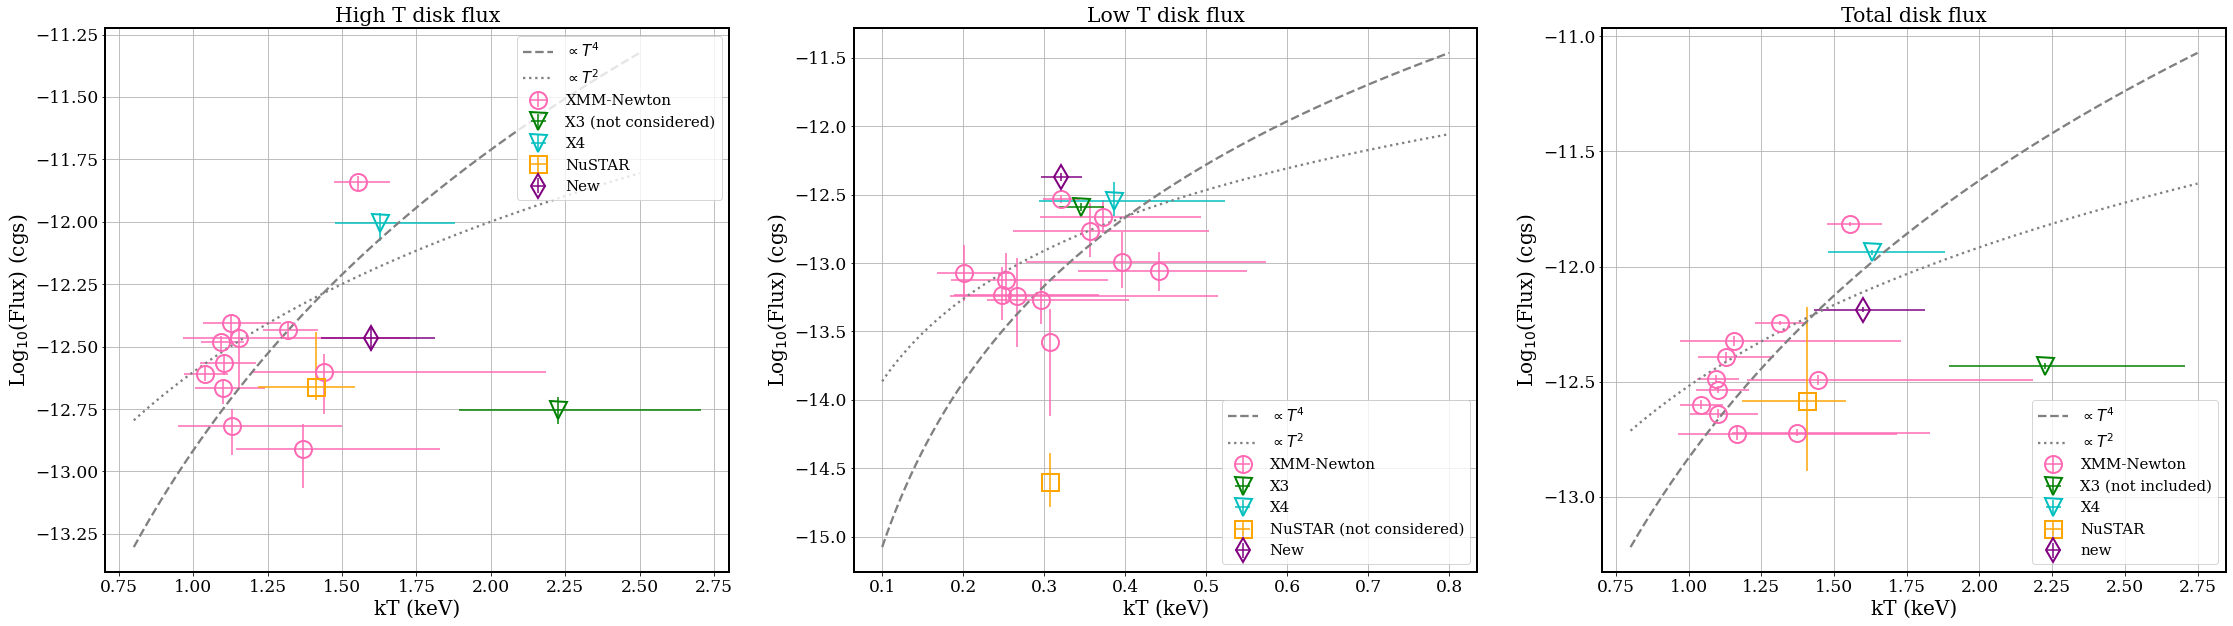

In [24]:

fig, axs = plt.subplots(1,3,figsize=(38,10))

#First
#---------------------------------------------------

#XMM
#axs[0].scatter(XMM_both['Th'],XMM_both['Flux_h'],color='hotpink', label=r'XMM-Newton',marker='o',linewidth=4)
axs[0].errorbar(XMM_both['Th'],XMM_both['Flux_h'],xerr=[abs(XMM_both['Th error(-)']).tolist(),XMM_both['Th error(+)'].tolist()],yerr=[abs(XMM_both['Flux_h error(-) ']).tolist(),XMM_both['Flux_h error(+) '].tolist()], fmt='o',color='hotpink',mfc='none',markersize=17,markeredgewidth=2, label=r'XMM-Newton')

#X3
#axs[0].scatter(X3_both['Th'],X3_both['Flux_h'],color='green', label=r'X3 (not considered)',marker='v',linewidth=4)
axs[0].errorbar(X3_both['Th'],X3_both['Flux_h'],xerr=[[abs(X3_both['Th error(-)'])],[X3_both['Th error(+)']]],yerr=[[abs(X3_both['Flux_h error(-) '])],[X3_both['Flux_h error(+) ']]], fmt='v',color='green',mfc='none',markersize=17,markeredgewidth=2, label=r'X3 (not considered)')

#X4
#axs[0].scatter(X4_both['Th'],X4_both['Flux_h'],color='c', label=r'X4',marker='v',linewidth=4)
axs[0].errorbar(X4_both['Th'],X4_both['Flux_h'],xerr=[[abs(X4_both['Th error(-)'])],[X4_both['Th error(+)']]],yerr=[[abs(X4_both['Flux_h error(-) '])],[X4_both['Flux_h error(+) ']]], fmt='v',color='c',mfc='none',markersize=17,markeredgewidth=2, label=r'X4')

#Nustar
#axs[0].scatter(Nu_both['Th'],Nu_both['Flux_h'],color='orange', label=r'NuSTAR',marker='s',linewidth=4)
axs[0].errorbar(Nu_both['Th'],Nu_both['Flux_h'],xerr=[[abs(Nu_both['Th error(-)'])],[Nu_both['Th error(+)']]],yerr=[[abs(Nu_both['Flux_h error(-) '])],[Nu_both['Flux_h error(+) ']]], fmt='s',color='orange',mfc='none',markersize=17,markeredgewidth=2, label=r'NuSTAR')

#Nustar
#axs[0].scatter(Nu_both['Th'],Nu_both['Flux_h'],color='orange', label=r'NuSTAR',marker='s',linewidth=4)
axs[0].errorbar(new_both['Th'],new_both['Flux_h'],xerr=[[abs(new_both['Th error(-)'])],[new_both['Th error(+)']]],yerr=[[abs(new_both['Flux_h error(-) '])],[new_both['Flux_h error(+) ']]], fmt='d',color='purple',mfc='none',markersize=17,markeredgewidth=2, label=r'New')

#plot and fit
axs[0].plot(x1,np.log10(yfitx3),label=r'$\propto$$T^4$',linestyle='dashed',color='gray',linewidth=2.3)
axs[0].plot(x1,np.log10(yfit2x3),label=r'$\propto$$T^2$',linestyle='dotted',color='gray',linewidth=2.3)
axs[0].set_title("High T disk flux")
axs[0].set_xlabel(r'kT (keV)', fontsize=20)
axs[0].set_ylabel(r'Log$_{10}$(Flux) (cgs)', fontsize=20)
axs[0].legend(loc='upper right',fontsize=15)
axs[0].grid()

#Second
#---------------------------------------------------

#XMM
#axs[1].scatter(XMM_both['Tl'],XMM_both['Flux_l'],color='hotpink', label=r'XMM-Newton',marker='o',linewidth=4)
axs[1].errorbar(XMM_both['Tl'],XMM_both['Flux_l'],xerr=[abs(XMM_both['Tl error(-)']).tolist(),XMM_both['Tl error(+)'].tolist()],yerr=[abs(XMM_both['Flux_l error(-) ']).tolist(),XMM_both['Flux_l error(+) '].tolist()], fmt='o',color='hotpink',mfc='none',markersize=17,markeredgewidth=2, label=r'XMM-Newton')

#X3
#axs[1].scatter(X3_both['Tl'],X3_both['Flux_l'],color='green', label=r'X3',marker='v',linewidth=4)
axs[1].errorbar(X3_both['Tl'],X3_both['Flux_l'],xerr=[[abs(X3_both['Tl error(-)'])],[X3_both['Tl error(+)']]],yerr=[[abs(X3_both['Flux_l error(-) '])],[X3_both['Flux_l error(+) ']]], fmt='v',color='green',mfc='none',markersize=17,markeredgewidth=2, label=r'X3')

#X4
#axs[1].scatter(X4_both['Tl'],X4_both['Flux_l'],color='c', label=r'X4',marker='v',linewidth=4)
axs[1].errorbar(X4_both['Tl'],X4_both['Flux_l'],xerr=[[abs(X4_both['Tl error(-)'])],[X4_both['Tl error(+)']]],yerr=[[abs(X4_both['Flux_l error(-) '])],[X4_both['Flux_l error(+) ']]], fmt='v',color='c',mfc='none',markersize=17,markeredgewidth=2, label=r'X4')

#Nustar
#axs[1].scatter(Nu_both['Tl'],Nu_both['Flux_l'],color='orange', label=r'NuSTAR (not considered)',marker='s',linewidth=4)
axs[1].errorbar(Nu_both['Tl'],Nu_both['Flux_l'],xerr=[[abs(Nu_both['Tl error(-)'])],[Nu_both['Tl error(+)']]],yerr=[[abs(Nu_both['Flux_l error(-) '])],[Nu_both['Flux_l error(+) ']]], fmt='s',color='orange',mfc='none',markersize=17,markeredgewidth=2, label=r'NuSTAR (not considered)')

axs[1].errorbar(new_both['Tl'],new_both['Flux_l'],xerr=[[abs(new_both['Tl error(-)'])],[new_both['Tl error(+)']]],yerr=[[abs(new_both['Flux_l error(-) '])],[new_both['Flux_l error(+) ']]], fmt='d',color='purple',mfc='none',markersize=17,markeredgewidth=2, label=r'New')
#plot and fit
axs[1].plot(x2,np.log10(yfitNu),label=r'$\propto$$T^4$',linestyle='dashed',color='gray',linewidth=2.3)
axs[1].plot(x2,np.log10(yfitNu2),label=r'$\propto$$T^2$',linestyle='dotted',color='gray',linewidth=2.3)
axs[1].set_title("Low T disk flux")
axs[1].set_xlabel(r'kT (keV)', fontsize=20)
axs[1].set_ylabel(r'Log$_{10}$(Flux) (cgs)', fontsize=20)
axs[1].legend(loc='lower right',fontsize=15)
axs[1].grid()


#Third
#---------------------------------------------------

#XMM
#axs[2].scatter(XMM_total['T'],XMM_total['Flux'],color='hotpink', label=r'XMM-Newton',marker='o',linewidth=4)
axs[2].errorbar(XMM_total['T'],XMM_total['Flux'],xerr=[abs(XMM_total['T error(-)']).tolist(),XMM_total['T error(+)'].tolist()],yerr=[abs(XMM_total['Flux error(-) ']).tolist(),XMM_total['Flux error(+) '].tolist()], fmt='o',color='hotpink',mfc='none',markersize=17,markeredgewidth=2, label=r'XMM-Newton')

#X3
#axs[2].scatter(X3_total['T'],X3_total['Flux'],color='green', label=r'X3',marker='v',linewidth=4)
axs[2].errorbar(X3_total['T'],X3_total['Flux'],xerr=[[abs(X3_total['T error(-)'])],[X3_total['T error(+)']]],yerr=[[abs(X3_total['Flux error(-) '])],[X3_total['Flux error(+) ']]], fmt='v',color='green',mfc='none',markersize=17,markeredgewidth=2, label=r'X3 (not included)')

#X4
#axs[2].scatter(X4_total['T'],X4_total['Flux'],color='c', label=r'X4',marker='v',linewidth=4)
axs[2].errorbar(X4_total['T'],X4_total['Flux'],xerr=[[abs(X4_total['T error(-)'])],[X4_total['T error(+)']]],yerr=[[abs(X4_total['Flux error(-) '])],[X4_total['Flux error(+) ']]], fmt='v',color='c',mfc='none',markersize=17,markeredgewidth=2, label=r'X4')

#Nustar
#axs[2].scatter(Nu_total['T'],Nu_total['Flux'],color='orange', label=r'NuSTAR',marker='s',linewidth=4)
axs[2].errorbar(Nu_total['T'],Nu_total['Flux'],xerr=[[abs(Nu_total['T error(-)'])],[Nu_total['T error(+)']]],yerr=[[abs(Nu_total['Flux error(-) '])],[Nu_total['Flux error(+) ']]], fmt='s',color='orange',mfc='none',markersize=17,markeredgewidth=2, label=r'NuSTAR')

axs[2].errorbar(new_total['T'],new_total['Flux'],xerr=[[abs(new_total['T error(-)'])],[new_total['T error(+)']]],yerr=[[abs(new_total['Flux error(-) '])],[new_total['Flux error(+) ']]], fmt='d',color='purple',mfc='none',markersize=17,markeredgewidth=2, label=r'new')
#plot and fit
axs[2].plot(x3,np.log10(yfit5),label=r'$\propto$$T^4$',linestyle='dashed',color='gray',linewidth=2.3)
axs[2].plot(x3,np.log10(yfit6),label=r'$\propto$$T^2$',linestyle='dotted',color='gray',linewidth=2.3)
axs[2].set_title("Total disk flux")
axs[2].set_xlabel(r'kT (keV)', fontsize=20)
axs[2].set_ylabel(r'Log$_{10}$(Flux) (cgs)', fontsize=20)
axs[2].legend(loc='lower right',fontsize=15)
axs[2].grid()
plt.show()

#### Quantification High T disk

- Model specification

In [25]:
def func(x, A):
    return A*x**4

params, covs = curve_fit(func,wX3_both['Th'],10**wX3_both['Flux_h'])
A = params[0] #stefan-boltzmann constant?
yfitx3_new = A*wX3_both['Th']**4

print('σ =', A)



σ = 1.2155337295348885e-13


In [26]:
wX3_both['expected']=yfitx3_new


- $\chi^2$ test

In [27]:
def Chi_Square(obs_freq, exp_freq):
    count = len(obs_freq)
    chi_sq = 0
    for i in range(0,count-1):
        if i==11:
            continue
        x = (obs_freq[i] - exp_freq[i]) ** 2
        x = x / exp_freq[i]
        chi_sq += x
    return abs(chi_sq)

In [28]:
Chi_Square(wX3_both['Flux_h'], np.log10(wX3_both['expected'])) 

0.06515025225799233

- R$^2$ test

In [29]:
yhat = np.log10(yfitx3_new)
y=wX3_both['Flux_h']
ybar = np.mean(y)
ssreg = np.sum((yhat-ybar)**2)
sstot = np.sum((y - ybar)**2)
r2 = ssreg / sstot
r2

0.9526824679737239

In [30]:
linear_model=np.polyfit(y,yhat,1)
linear_model_fn=np.poly1d(linear_model)
x_s=np.linspace(min(y),max(y),1000)

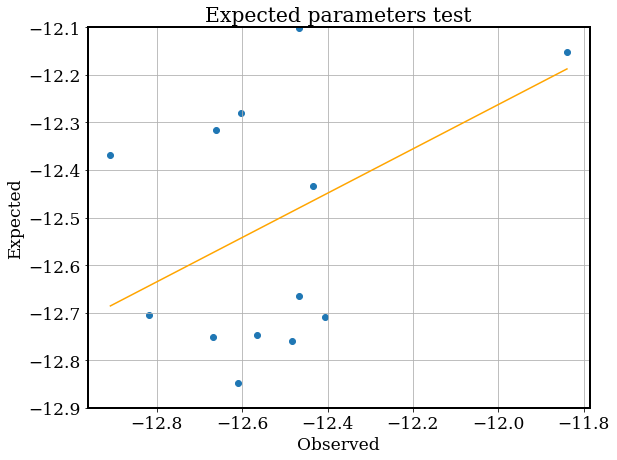

In [31]:
plt.figure(figsize=(9,7))
plt.scatter(y,yhat)
plt.plot(x_s,linear_model_fn(x_s),c='orange')
plt.title("Expected parameters test")
plt.xlabel("Observed")
plt.ylabel("Expected")
plt.ylim(-12.9,-12.1)
plt.grid()

- **Correlations**

1. Flux vs T

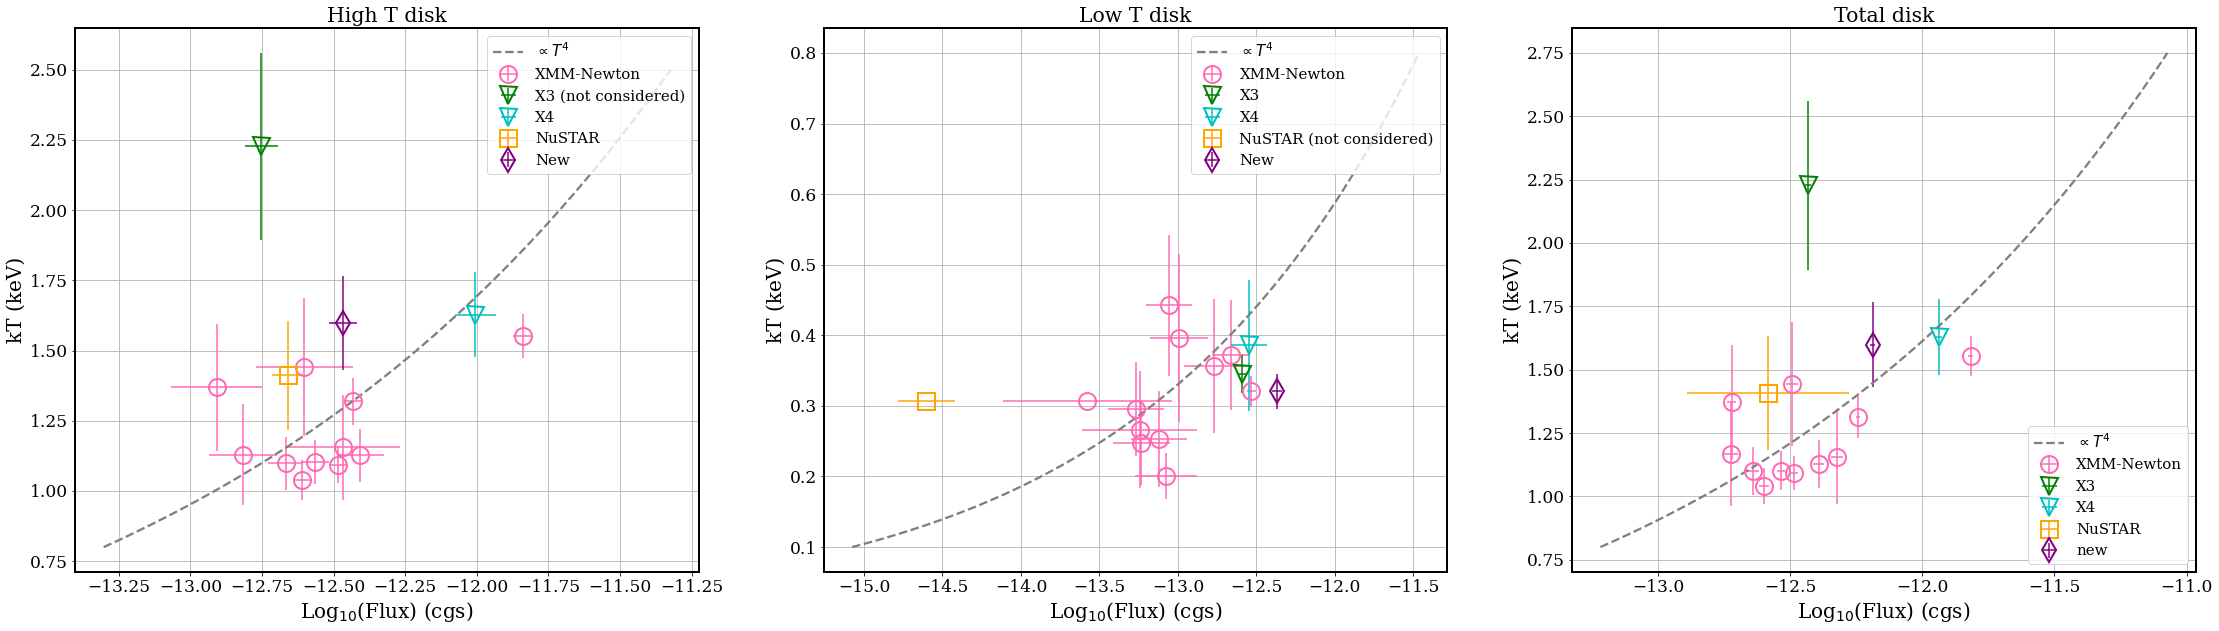

In [32]:

fig, axs = plt.subplots(1,3,figsize=(38,10))

#First
#---------------------------------------------------

#XMM
#axs[0].scatter(XMM_both['Th'],XMM_both['Flux_h'],color='hotpink', label=r'XMM-Newton',marker='o',linewidth=4)
axs[0].errorbar(XMM_both['Flux_h'],XMM_both['Th'],yerr=np.array(XMM_both['Th error(-)'],XMM_both['Th error(+)']),xerr=np.array(XMM_both['Flux_h error(-) '],XMM_both['Flux_h error(+) ']), fmt='o',color='hotpink',mfc='none',markersize=17,markeredgewidth=2, label=r'XMM-Newton')

#X3
#axs[0].scatter(X3_both['Th'],X3_both['Flux_h'],color='green', label=r'X3 (not considered)',marker='v',linewidth=4)
axs[0].errorbar(X3_both['Flux_h'],X3_both['Th'],yerr=np.array(X3_both['Th error(-)'],X3_both['Th error(+)']),xerr=np.array(X3_both['Flux_h error(-) '],X3_both['Flux_h error(+) ']), fmt='v',color='green',mfc='none',markersize=17,markeredgewidth=2, label=r'X3 (not considered)')

#X4
#axs[0].scatter(X4_both['Th'],X4_both['Flux_h'],color='c', label=r'X4',marker='v',linewidth=4)
axs[0].errorbar(X4_both['Flux_h'],X4_both['Th'],yerr=np.array(X4_both['Th error(-)'],X4_both['Th error(+)']),xerr=np.array(X4_both['Flux_h error(-) '],X4_both['Flux_h error(+) ']), fmt='v',color='c',mfc='none',markersize=17,markeredgewidth=2, label=r'X4')

#Nustar
#axs[0].scatter(Nu_both['Th'],Nu_both['Flux_h'],color='orange', label=r'NuSTAR',marker='s',linewidth=4)
axs[0].errorbar(Nu_both['Flux_h'],Nu_both['Th'],yerr=np.array(Nu_both['Th error(-)'],Nu_both['Th error(+)']),xerr=np.array(Nu_both['Flux_h error(-) '],Nu_both['Flux_h error(+) ']), fmt='s',color='orange',mfc='none',markersize=17,markeredgewidth=2, label=r'NuSTAR')

#Nustar
#axs[0].scatter(Nu_both['Th'],Nu_both['Flux_h'],color='orange', label=r'NuSTAR',marker='s',linewidth=4)
axs[0].errorbar(new_both['Flux_h'],new_both['Th'],yerr=np.array(new_both['Th error(-)'],new_both['Th error(+)']),xerr=np.array(new_both['Flux_h error(-) '],new_both['Flux_h error(+) ']), fmt='d',color='purple',mfc='none',markersize=17,markeredgewidth=2, label=r'New')

#plot and fit
axs[0].plot(np.log10(yfitx3),x1,label=r'$\propto$$T^4$',linestyle='dashed',color='gray',linewidth=2.3)
axs[0].set_title("High T disk")
axs[0].set_ylabel(r'kT (keV)', fontsize=20)
axs[0].set_xlabel(r'Log$_{10}$(Flux) (cgs)', fontsize=20)
axs[0].legend(loc='upper right',fontsize=15)
axs[0].grid()

#Second
#---------------------------------------------------

#XMM
#axs[1].scatter(XMM_both['Tl'],XMM_both['Flux_l'],color='hotpink', label=r'XMM-Newton',marker='o',linewidth=4)
axs[1].errorbar(XMM_both['Flux_l'],XMM_both['Tl'],yerr=np.array(XMM_both['Tl error(-)'],XMM_both['Tl error(+)']),xerr=np.array(XMM_both['Flux_l error(-) '],XMM_both['Flux_l error(+) ']), fmt='o',color='hotpink',mfc='none',markersize=17,markeredgewidth=2, label=r'XMM-Newton')

#X3
#axs[1].scatter(X3_both['Tl'],X3_both['Flux_l'],color='green', label=r'X3',marker='v',linewidth=4)
axs[1].errorbar(X3_both['Flux_l'],X3_both['Tl'],yerr=np.array(X3_both['Tl error(-)'],X3_both['Tl error(+)']),xerr=np.array(X3_both['Flux_l error(-) '],X3_both['Flux_l error(+) ']), fmt='v',color='green',mfc='none',markersize=17,markeredgewidth=2, label=r'X3')

#X4
#axs[1].scatter(X4_both['Tl'],X4_both['Flux_l'],color='c', label=r'X4',marker='v',linewidth=4)
axs[1].errorbar(X4_both['Flux_l'],X4_both['Tl'],yerr=np.array(X4_both['Tl error(-)'],X4_both['Tl error(+)']),xerr=np.array(X4_both['Flux_l error(-) '],X4_both['Flux_l error(+) ']), fmt='v',color='c',mfc='none',markersize=17,markeredgewidth=2, label=r'X4')

#Nustar
#axs[1].scatter(Nu_both['Tl'],Nu_both['Flux_l'],color='orange', label=r'NuSTAR (not considered)',marker='s',linewidth=4)
axs[1].errorbar(Nu_both['Flux_l'],Nu_both['Tl'],yerr=np.array(Nu_both['Tl error(-)'],Nu_both['Tl error(+)']),xerr=np.array(Nu_both['Flux_l error(-) '],Nu_both['Flux_l error(+) ']), fmt='s',color='orange',mfc='none',markersize=17,markeredgewidth=2, label=r'NuSTAR (not considered)')

axs[1].errorbar(new_both['Flux_l'],new_both['Tl'],yerr=np.array(new_both['Tl error(-)'],new_both['Tl error(+)']),xerr=np.array(new_both['Flux_l error(-) '],new_both['Flux_l error(+) ']), fmt='d',color='purple',mfc='none',markersize=17,markeredgewidth=2, label=r'New')
#plot and fit
axs[1].plot(np.log10(yfitNu),x2,label=r'$\propto$$T^4$',linestyle='dashed',color='gray',linewidth=2.3)
axs[1].set_title("Low T disk")
axs[1].set_ylabel(r'kT (keV)', fontsize=20)
axs[1].set_xlabel(r'Log$_{10}$(Flux) (cgs)', fontsize=20)
axs[1].legend(loc='upper right',fontsize=15)
axs[1].grid()


#Third
#---------------------------------------------------

#XMM
#axs[2].scatter(XMM_total['T'],XMM_total['Flux'],color='hotpink', label=r'XMM-Newton',marker='o',linewidth=4)
axs[2].errorbar(XMM_total['Flux'],XMM_total['T'],yerr=np.array(XMM_total['T error(-)'],XMM_total['T error(+)']),xerr=np.array(XMM_total['Flux error(-) '],XMM_total['Flux error(+) ']), fmt='o',color='hotpink',mfc='none',markersize=17,markeredgewidth=2, label=r'XMM-Newton')

#X3
#axs[2].scatter(X3_total['T'],X3_total['Flux'],color='green', label=r'X3',marker='v',linewidth=4)
axs[2].errorbar(X3_total['Flux'],X3_total['T'],yerr=np.array(X3_total['T error(-)'],X3_total['T error(+)']),xerr=np.array(X3_total['Flux error(-) '],X3_total['Flux error(+) ']), fmt='v',color='green',mfc='none',markersize=17,markeredgewidth=2, label=r'X3')

#X4
#axs[2].scatter(X4_total['T'],X4_total['Flux'],color='c', label=r'X4',marker='v',linewidth=4)
axs[2].errorbar(X4_total['Flux'],X4_total['T'],yerr=np.array(X4_total['T error(-)'],X4_total['T error(+)']),xerr=np.array(X4_total['Flux error(-) '],X4_total['Flux error(+) ']), fmt='v',color='c',mfc='none',markersize=17,markeredgewidth=2, label=r'X4')

#Nustar
#axs[2].scatter(Nu_total['T'],Nu_total['Flux'],color='orange', label=r'NuSTAR',marker='s',linewidth=4)
axs[2].errorbar(Nu_total['Flux'],Nu_total['T'],yerr=np.array(Nu_total['T error(-)'],Nu_total['T error(+)']),xerr=np.array(Nu_total['Flux error(-) '],Nu_total['Flux error(+) ']), fmt='s',color='orange',mfc='none',markersize=17,markeredgewidth=2, label=r'NuSTAR')

axs[2].errorbar(new_total['Flux'],new_total['T'],yerr=np.array(new_total['T error(-)'],new_total['T error(+)']),xerr=np.array(new_total['Flux error(-) '],new_total['Flux error(+) ']), fmt='d',color='purple',mfc='none',markersize=17,markeredgewidth=2, label=r'new')
#plot and fit
axs[2].plot(np.log10(yfit5),x3,label=r'$\propto$$T^4$',linestyle='dashed',color='gray',linewidth=2.3)
axs[2].set_title("Total disk")
axs[2].set_ylabel(r'kT (keV)', fontsize=20)
axs[2].set_xlabel(r'Log$_{10}$(Flux) (cgs)', fontsize=20)
axs[2].legend(loc='lower right',fontsize=15)
axs[2].grid()
plt.show()


3. Flux h vs Flux L

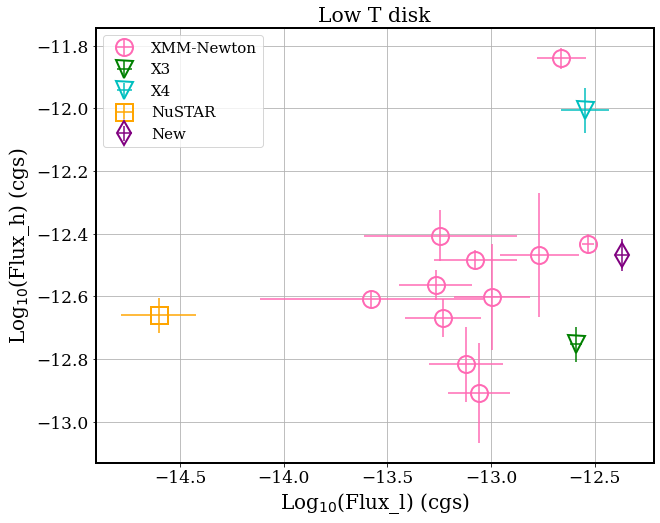

In [33]:
plt.figure(figsize=(10,8))
#Second
#---------------------------------------------------

#XMM
#axs[1].scatter(XMM_both['Tl'],XMM_both['Flux_l'],color='hotpink', label=r'XMM-Newton',marker='o',linewidth=4)
plt.errorbar(XMM_both['Flux_l'],XMM_both['Flux_h'],yerr=np.array(XMM_both['Flux_h error(-) '],XMM_both['Flux_h error(+) ']),xerr=np.array(XMM_both['Flux_l error(-) '],XMM_both['Flux_l error(+) ']), fmt='o',color='hotpink',mfc='none',markersize=17,markeredgewidth=2, label=r'XMM-Newton')

#X3
#axs[1].scatter(X3_both['Tl'],X3_both['Flux_l'],color='green', label=r'X3',marker='v',linewidth=4)
plt.errorbar(X3_both['Flux_l'],X3_both['Flux_h'],yerr=np.array(X3_both['Flux_h error(-) '],X3_both['Flux_h error(+) ']),xerr=np.array(X3_both['Flux_l error(-) '],X3_both['Flux_l error(+) ']), fmt='v',color='green',mfc='none',markersize=17,markeredgewidth=2, label=r'X3')

#X4
#axs[1].scatter(X4_both['Tl'],X4_both['Flux_l'],color='c', label=r'X4',marker='v',linewidth=4)
plt.errorbar(X4_both['Flux_l'],X4_both['Flux_h'],yerr=np.array(X4_both['Flux_h error(-) '],X4_both['Flux_h error(+) ']),xerr=np.array(X4_both['Flux_l error(-) '],X4_both['Flux_l error(+) ']), fmt='v',color='c',mfc='none',markersize=17,markeredgewidth=2, label=r'X4')

#Nustar
#axs[1].scatter(Nu_both['Tl'],Nu_both['Flux_l'],color='orange', label=r'NuSTAR (not considered)',marker='s',linewidth=4)
plt.errorbar(Nu_both['Flux_l'],Nu_both['Flux_h'],yerr=np.array(Nu_both['Flux_h error(-) '],Nu_both['Flux_h error(+) ']),xerr=np.array(Nu_both['Flux_l error(-) '],Nu_both['Flux_l error(+) ']), fmt='s',color='orange',mfc='none',markersize=17,markeredgewidth=2, label=r'NuSTAR')

plt.errorbar(new_both['Flux_l'],new_both['Flux_h'],yerr=np.array(new_both['Flux_h error(-) '],new_both['Flux_h error(+) ']),xerr=np.array(new_both['Flux_l error(-) '],new_both['Flux_l error(+) ']), fmt='d',color='purple',mfc='none',markersize=17,markeredgewidth=2, label=r'New')

#plot and fit
plt.title("Low T disk")
plt.xlabel(r'Log$_{10}$(Flux_l) (cgs)', fontsize=20)
plt.ylabel(r'Log$_{10}$(Flux_h) (cgs)', fontsize=20)
plt.legend(loc='upper left',fontsize=15)
plt.grid()

NH PLOT

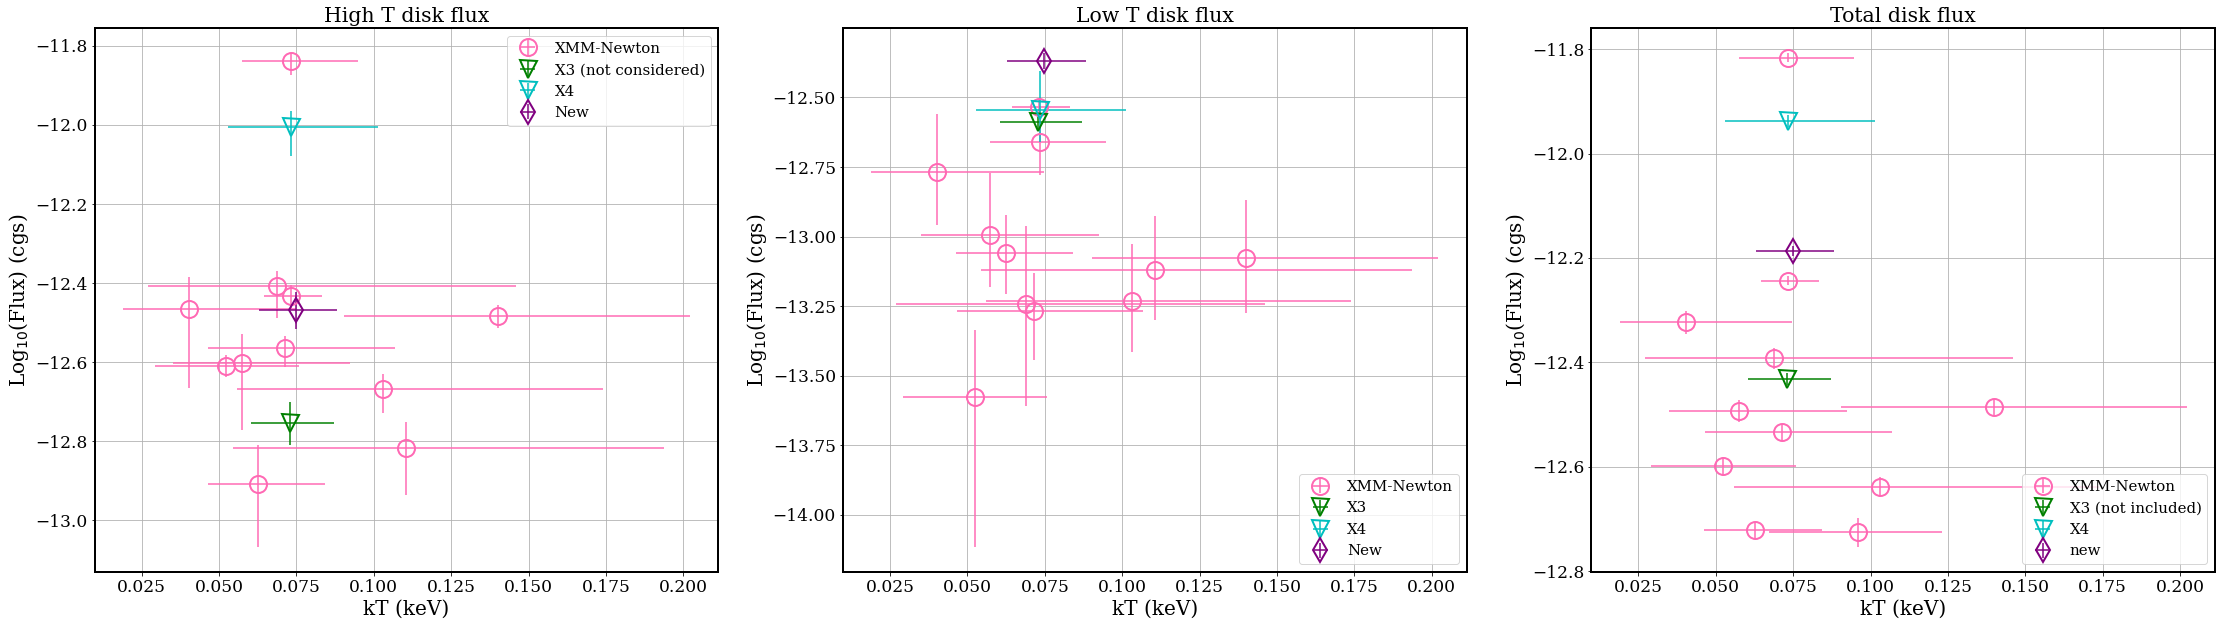

In [34]:
fig, axs = plt.subplots(1,3,figsize=(38,10))

#First
#---------------------------------------------------

#XMM
#axs[0].scatter(XMM_both['Th'],XMM_both['Flux_h'],color='hotpink', label=r'XMM-Newton',marker='o',linewidth=4)
axs[0].errorbar(XMM_both['N(10^22)'],XMM_both['Flux_h'],xerr=[abs(XMM_both['N error -']).tolist(),XMM_both['N error +'].tolist()],yerr=[abs(XMM_both['Flux_h error(-) ']).tolist(),XMM_both['Flux_h error(+) '].tolist()], fmt='o',color='hotpink',mfc='none',markersize=17,markeredgewidth=2, label=r'XMM-Newton')

#X3
#axs[0].scatter(X3_both['Th'],X3_both['Flux_h'],color='green', label=r'X3 (not considered)',marker='v',linewidth=4)
axs[0].errorbar(X3_both['N(10^22)'],X3_both['Flux_h'],xerr=[[abs(X3_both['N error -'])],[X3_both['N error +']]],yerr=[[abs(X3_both['Flux_h error(-) '])],[X3_both['Flux_h error(+) ']]], fmt='v',color='green',mfc='none',markersize=17,markeredgewidth=2, label=r'X3 (not considered)')

#X4
#axs[0].scatter(X4_both['Th'],X4_both['Flux_h'],color='c', label=r'X4',marker='v',linewidth=4)
axs[0].errorbar(X4_both['N(10^22)'],X4_both['Flux_h'],xerr=[[abs(X4_both['N error -'])],[X4_both['N error +']]],yerr=[[abs(X4_both['Flux_h error(-) '])],[X4_both['Flux_h error(+) ']]], fmt='v',color='c',mfc='none',markersize=17,markeredgewidth=2, label=r'X4')

#Nustar
#axs[0].scatter(Nu_both['Th'],Nu_both['Flux_h'],color='orange', label=r'NuSTAR',marker='s',linewidth=4)
#axs[0].errorbar(Nu_both['N(10^22)'],Nu_both['Flux_h'],xerr=[[abs(Nu_both['N error -'])],[Nu_both['N error +']]],yerr=[[abs(Nu_both['Flux_h error(-) '])],[Nu_both['Flux_h error(+) ']]], fmt='s',color='orange',mfc='none',markersize=17,markeredgewidth=2, label=r'NuSTAR')

#Nustar
#axs[0].scatter(Nu_both['Th'],Nu_both['Flux_h'],color='orange', label=r'NuSTAR',marker='s',linewidth=4)
axs[0].errorbar(new_both['N(10^22)'],new_both['Flux_h'],xerr=[[abs(new_both['N error -'])],[new_both['N error +']]],yerr=[[abs(new_both['Flux_h error(-) '])],[new_both['Flux_h error(+) ']]], fmt='d',color='purple',mfc='none',markersize=17,markeredgewidth=2, label=r'New')

#plot and fit
#axs[0].plot(x1,np.log10(yfitx3),label=r'$\propto$$T^4$',linestyle='dashed',color='gray',linewidth=2.3)
#axs[0].plot(x1,np.log10(yfit2x3),label=r'$\propto$$T^2$',linestyle='dotted',color='gray',linewidth=2.3)
axs[0].set_title("High T disk flux")
axs[0].set_xlabel(r'kT (keV)', fontsize=20)
axs[0].set_ylabel(r'Log$_{10}$(Flux) (cgs)', fontsize=20)
axs[0].legend(loc='upper right',fontsize=15)
axs[0].grid()

#Second
#---------------------------------------------------

#XMM
#axs[1].scatter(XMM_both['Tl'],XMM_both['Flux_l'],color='hotpink', label=r'XMM-Newton',marker='o',linewidth=4)
axs[1].errorbar(XMM_both['N(10^22)'],XMM_both['Flux_l'],xerr=[abs(XMM_both['N error -']).tolist(),XMM_both['N error +'].tolist()],yerr=[abs(XMM_both['Flux_l error(-) ']).tolist(),XMM_both['Flux_l error(+) '].tolist()], fmt='o',color='hotpink',mfc='none',markersize=17,markeredgewidth=2, label=r'XMM-Newton')

#X3
#axs[1].scatter(X3_both['Tl'],X3_both['Flux_l'],color='green', label=r'X3',marker='v',linewidth=4)
axs[1].errorbar(X3_both['N(10^22)'],X3_both['Flux_l'],xerr=[[abs(X3_both['N error -'])],[X3_both['N error +']]],yerr=[[abs(X3_both['Flux_l error(-) '])],[X3_both['Flux_l error(+) ']]], fmt='v',color='green',mfc='none',markersize=17,markeredgewidth=2, label=r'X3')

#X4
#axs[1].scatter(X4_both['Tl'],X4_both['Flux_l'],color='c', label=r'X4',marker='v',linewidth=4)
axs[1].errorbar(X4_both['N(10^22)'],X4_both['Flux_l'],xerr=[[abs(X4_both['N error -'])],[X4_both['N error +']]],yerr=[[abs(X4_both['Flux_l error(-) '])],[X4_both['Flux_l error(+) ']]], fmt='v',color='c',mfc='none',markersize=17,markeredgewidth=2, label=r'X4')

#Nustar
#axs[1].scatter(Nu_both['Tl'],Nu_both['Flux_l'],color='orange', label=r'NuSTAR (not considered)',marker='s',linewidth=4)
#axs[1].errorbar(Nu_both['N(10^22)'],Nu_both['Flux_l'],xerr=[[abs(Nu_both['N error -'])],[Nu_both['N error +']]],yerr=[[abs(Nu_both['Flux_l error(-) '])],[Nu_both['Flux_l error(+) ']]], fmt='s',color='orange',mfc='none',markersize=17,markeredgewidth=2, label=r'NuSTAR (not considered)')

axs[1].errorbar(new_both['N(10^22)'],new_both['Flux_l'],xerr=[[abs(new_both['N error -'])],[new_both['N error +']]],yerr=[[abs(new_both['Flux_l error(-) '])],[new_both['Flux_l error(+) ']]], fmt='d',color='purple',mfc='none',markersize=17,markeredgewidth=2, label=r'New')
#plot and fit
#axs[1].plot(x2,np.log10(yfitNu),label=r'$\propto$$T^4$',linestyle='dashed',color='gray',linewidth=2.3)
#axs[1].plot(x2,np.log10(yfitNu2),label=r'$\propto$$T^2$',linestyle='dotted',color='gray',linewidth=2.3)
axs[1].set_title("Low T disk flux")
axs[1].set_xlabel(r'kT (keV)', fontsize=20)
axs[1].set_ylabel(r'Log$_{10}$(Flux) (cgs)', fontsize=20)
axs[1].legend(loc='lower right',fontsize=15)
axs[1].grid()


#Third
#---------------------------------------------------

#XMM
#axs[2].scatter(XMM_total['T'],XMM_total['Flux'],color='hotpink', label=r'XMM-Newton',marker='o',linewidth=4)
axs[2].errorbar(XMM_total['N(10^22)'],XMM_total['Flux'],xerr=[abs(XMM_total['N error -']).tolist(),XMM_total['N error +'].tolist()],yerr=[abs(XMM_total['Flux error(-) ']).tolist(),XMM_total['Flux error(+) '].tolist()], fmt='o',color='hotpink',mfc='none',markersize=17,markeredgewidth=2, label=r'XMM-Newton')

#X3
#axs[2].scatter(X3_total['T'],X3_total['Flux'],color='green', label=r'X3',marker='v',linewidth=4)
axs[2].errorbar(X3_total['N(10^22)'],X3_total['Flux'],xerr=[[abs(X3_total['N error -'])],[X3_total['N error +']]],yerr=[[abs(X3_total['Flux error(-) '])],[X3_total['Flux error(+) ']]], fmt='v',color='green',mfc='none',markersize=17,markeredgewidth=2, label=r'X3 (not included)')

#X4
#axs[2].scatter(X4_total['T'],X4_total['Flux'],color='c', label=r'X4',marker='v',linewidth=4)
axs[2].errorbar(X4_total['N(10^22)'],X4_total['Flux'],xerr=[[abs(X4_total['N error -'])],[X4_total['N error +']]],yerr=[[abs(X4_total['Flux error(-) '])],[X4_total['Flux error(+) ']]], fmt='v',color='c',mfc='none',markersize=17,markeredgewidth=2, label=r'X4')

#Nustar
#axs[2].scatter(Nu_total['T'],Nu_total['Flux'],color='orange', label=r'NuSTAR',marker='s',linewidth=4)
#axs[2].errorbar(Nu_total['N(10^22)'],Nu_total['Flux'],xerr=[[abs(Nu_total['N error -'])],[Nu_total['N error +']]],yerr=[[abs(Nu_total['Flux error(-) '])],[Nu_total['Flux error(+) ']]], fmt='s',color='orange',mfc='none',markersize=17,markeredgewidth=2, label=r'NuSTAR')

axs[2].errorbar(new_total['N(10^22)'],new_total['Flux'],xerr=[[abs(new_total['N error -'])],[new_total['N error +']]],yerr=[[abs(new_total['Flux error(-) '])],[new_total['Flux error(+) ']]], fmt='d',color='purple',mfc='none',markersize=17,markeredgewidth=2, label=r'new')
#plot and fit
#axs[2].plot(x3,np.log10(yfit5),label=r'$\propto$$T^4$',linestyle='dashed',color='gray',linewidth=2.3)
#axs[2].plot(x3,np.log10(yfit6),label=r'$\propto$$T^2$',linestyle='dotted',color='gray',linewidth=2.3)
axs[2].set_title("Total disk flux")
axs[2].set_xlabel(r'kT (keV)', fontsize=20)
axs[2].set_ylabel(r'Log$_{10}$(Flux) (cgs)', fontsize=20)
axs[2].legend(loc='lower right',fontsize=15)
axs[2].grid()

## 2. Luminosity plots.

- Luminosity calculus 

## <center> $L=4 \pi d^2 F$ <center>
where d=3.40 Mpc

In [35]:
d=3.40*3.0857*10**24

In [36]:
data_total['Flux(cm)']=10**data_total['Flux']
data_total['Luminosity']=4*np.pi*d**2*data_total['Flux(cm)']

data_both['Flux_h(cm)']=10**data_both['Flux_h']
data_both['Luminosity_h']=4*np.pi*d**2*data_both['Flux_h(cm)']

data_both['Flux_l(cm)']=10**data_both['Flux_l']
data_both['Luminosity_l']=4*np.pi*d**2*data_both['Flux_l(cm)']

- Luminosity errors.

In [37]:
data_total['Luminosity error(+)']=10**(data_total['Flux'])* np.log(10)*4*np.pi*d**2 *data_total['Flux error(+) ']
data_total['Luminosity error(-)']=10**(data_total['Flux'])*np.log(10)*4*np.pi*d**2 *data_total['Flux error(-) ']

data_both['Luminosity_l error(+)']=10**(data_both['Flux_l'])*np.log(10)*4*np.pi*d**2 *data_both['Flux_l error(+) ']
data_both['Luminosity_l error(-)']=10**(data_both['Flux_l'])*np.log(10)*4*np.pi*d**2 * data_both['Flux_l error(-) ']

data_both['Luminosity_h error(+)']=10**(data_both['Flux_h'])*np.log(10)*4*np.pi*d**2 *data_both['Flux_h error(+) ']
data_both['Luminosity_h error(-)']=10**(data_both['Flux_h'])*np.log(10)*4*np.pi*d**2 * data_both['Flux_h error(-) ']


In [ ]:
data_both['Luminosity_h error(+)']

In [146]:
data_both['Luminosity_l']

0     7.474379e+37
1     4.054853e+38
2     1.048758e+38
3     1.211365e+38
4     8.101680e+37
5     3.657422e+37
6     1.160847e+38
7     3.014221e+38
8     1.400152e+38
9     2.363606e+38
10    7.897236e+37
11    3.565949e+38
12    3.945255e+38
13    3.450445e+36
14    5.933010e+38
Name: Luminosity_l, dtype: float64

## Comprobación errores

- Chungo

In [104]:
4*np.pi*d**2*10**data_total['Flux'] * 10 ** data_total['Flux error(-) ']

0     4.185374e+38
1     8.069622e+38
2     2.773705e+38
3     2.722202e+38
4     3.318191e+38
5     3.632681e+38
6     4.686163e+38
7     2.155368e+39
8     4.658454e+38
9     6.915144e+38
10    5.875125e+38
11    5.256646e+38
12    1.636196e+39
13    9.222637e+38
14    9.198627e+38
dtype: float64

In [134]:
data_both['Luminosity_l']

0     7.474379e+37
1     4.054853e+38
2     1.048758e+38
3     1.211365e+38
4     8.101680e+37
5     3.657422e+37
6     1.160847e+38
7     3.014221e+38
8     1.400152e+38
9     2.363606e+38
10    7.897236e+37
11    3.565949e+38
12    3.945255e+38
13    3.450445e+36
14    5.933010e+38
Name: Luminosity_l, dtype: float64

- Prop errores

In [135]:
data_both['Luminosity_l']+data_both['Luminosity_l error(+)']

0     9.813409e+37
1     4.311507e+38
2     1.515887e+38
3     1.588207e+38
4     1.192989e+38
5     5.706405e+37
6     1.713541e+38
7     3.884553e+38
8     2.114154e+38
9     3.490042e+38
10    1.299039e+38
11    3.787747e+38
12    5.203683e+38
13    5.163033e+36
14    6.313468e+38
dtype: float64

In [144]:
data_both['Flux_l error(+) ']

0     0.135908
1     0.027489
2     0.193440
3     0.135104
4     0.205213
5     0.243303
6     0.206773
7     0.125399
8     0.221467
9     0.206974
10    0.280089
11    0.027013
12    0.138528
13    0.215557
14    0.027849
Name: Flux_l error(+) , dtype: float64

> ### PLOTS LUMINOISTY

- Split DataFrame in obs

In [40]:
#Definimos los diferentes dataframes

X3_total=data_total.loc[11]
X3_both=data_both.loc[11]

X4_total=data_total.loc[12]
X4_both=data_both.loc[12]

Nu_total=data_total.loc[13]
Nu_both=data_both.loc[13]

XMM_total=data_total.loc[0:10]
XMM_both=data_both.loc[0:10]

new_total=data_total.loc[14]
new_both=data_both.loc[14]

-  FITS


High T disk flux

In [41]:
#Fit 1
x1=np.linspace(1,2.5,10000)

def func(x, A):
    return A*4*np.pi*d**2*x**4

params, covs = curve_fit(func,data_both['Th'],data_both['Luminosity_h'])
A = params[0] #stefan-boltzmann constant?
yfit1 = A*4*np.pi*d**2*x1**4

print('σ =', A)

σ = 3.5365972287984684e-14


In [42]:
#Fit 2
x1=np.linspace(1,2.5,10000)

def func(x, B):
    return B*4*np.pi*d**2*x**2

params, covs = curve_fit(func,data_both['Th'],data_both['Luminosity_h'])
B = params[0] #boltzmann constant
yfit3 = B*4*np.pi*d**2*x1**2

print('B =', B)

B = 1.742214648635887e-13


- High T disk flux without X3

In [43]:
wX3_both=data_both.drop(11)

In [44]:
#Fit 1
x1=np.linspace(0.8,2.25,10000)

def func(x, A):
    return A*4*np.pi*d**2*x**4

params, covs = curve_fit(func,wX3_both['Th'],wX3_both['Luminosity_h'])
A = params[0] #stefan-boltzmann constant?
yfitx3 = A*4*np.pi*d**2*x1**4

print('σ =', A)

σ = 1.215533728642929e-13


In [45]:
#Fit 1
x1=np.linspace(0.8,2.25,10000)

def func(x, A):
    return A*4*np.pi*d**2*x**2

params, covs = curve_fit(func,wX3_both['Th'],wX3_both['Luminosity_h'])
A = params[0] #stefan-boltzmann constant?
yfitx3_2 = A*4*np.pi*d**2*x1**2

print('σ =', A)

σ = 2.50399913119277e-13


- Low T disk flux

In [46]:
#Fit 1
x2=np.linspace(0.1,0.8,10000)

def func(x, A):
    return A*4*np.pi*d**2*x**4

params, covs = curve_fit(func,data_both['Tl'],data_both['Luminosity_l'])
A = params[0] #stefan-boltzmann constant?
yfit2 = A*4*np.pi*d**2*x2**4

print('σ =', A)

σ = 8.227730285272019e-12


In [47]:
#Fit 2
x2=np.linspace(0.1,0.8,10000)

def func(x, B):
    return B*4*np.pi*d**2*x**2

params, covs = curve_fit(func,data_both['Tl'],data_both['Luminosity_l'])
B = params[0] #boltzmann constant
yfit4 = B*4*np.pi*d**2*x2**2

print('B =', B)

B = 1.3068484788964237e-12


- Low T disk flux without Nu

In [48]:
wNu_both=data_both.drop(13)

In [49]:
#Fit 1
x2=np.linspace(0.15,0.6,10000)

def func(x, A):
    return A*4*np.pi*d**2*x**4

params, covs = curve_fit(func,wNu_both['Tl'],wNu_both['Luminosity_l'])
A = params[0] #stefan-boltzmann constant?
yfitNu = A*4*np.pi*d**2*x2**4

print('σ =', A)

σ = 8.390422996810915e-12


In [50]:
#Fit 1
x2=np.linspace(0.15,0.6,10000)

def func(x, A):
    return A*4*np.pi*d**2*x**2

params, covs = curve_fit(func,wNu_both['Tl'],wNu_both['Luminosity_l'])
A = params[0] #stefan-boltzmann constant?
yfitNu2 = A*4*np.pi*d**2*x2**2

print('σ =', A)

σ = 1.3674167172399297e-12


- Total flux

In [51]:
#data_total['T']=data_total['Tl']+data_total['Th']
data_total['T']=(data_total['Tl']**4 + data_total['Th']**4)**(1/4)

In [52]:
wX3_total=data_total.drop(11)

In [53]:
#data_total['T']=data_total['Tl']+data_total['Th']
wX3_total['T']=(wX3_total['Tl']**4 + wX3_total['Th']**4)**(1/4)

In [54]:
#Fit 1
x3=np.linspace(0.8,2.25,10000)


def func(x, A):
    return A*4*np.pi*d**2*x**4

params, covs = curve_fit(func,wX3_total['T'],wX3_total['Luminosity'])
A = params[0] #stefan-boltzmann constant?
yfit5 = A*4*np.pi*d**2*x3**4

print('σ =', A)

σ = 1.4797397943554752e-13


In [55]:
#Fit 1
x3=np.linspace(0.8,2.25,10000)


def func(x, A):
    return A*4*np.pi*d**2*x**2

params, covs = curve_fit(func,wX3_total['T'],wX3_total['Luminosity'])
A = params[0] #stefan-boltzmann constant?
yfit5_2 = A*4*np.pi*d**2*x3**2

print('σ =', A)

σ = 3.031088091984222e-13


- Plot

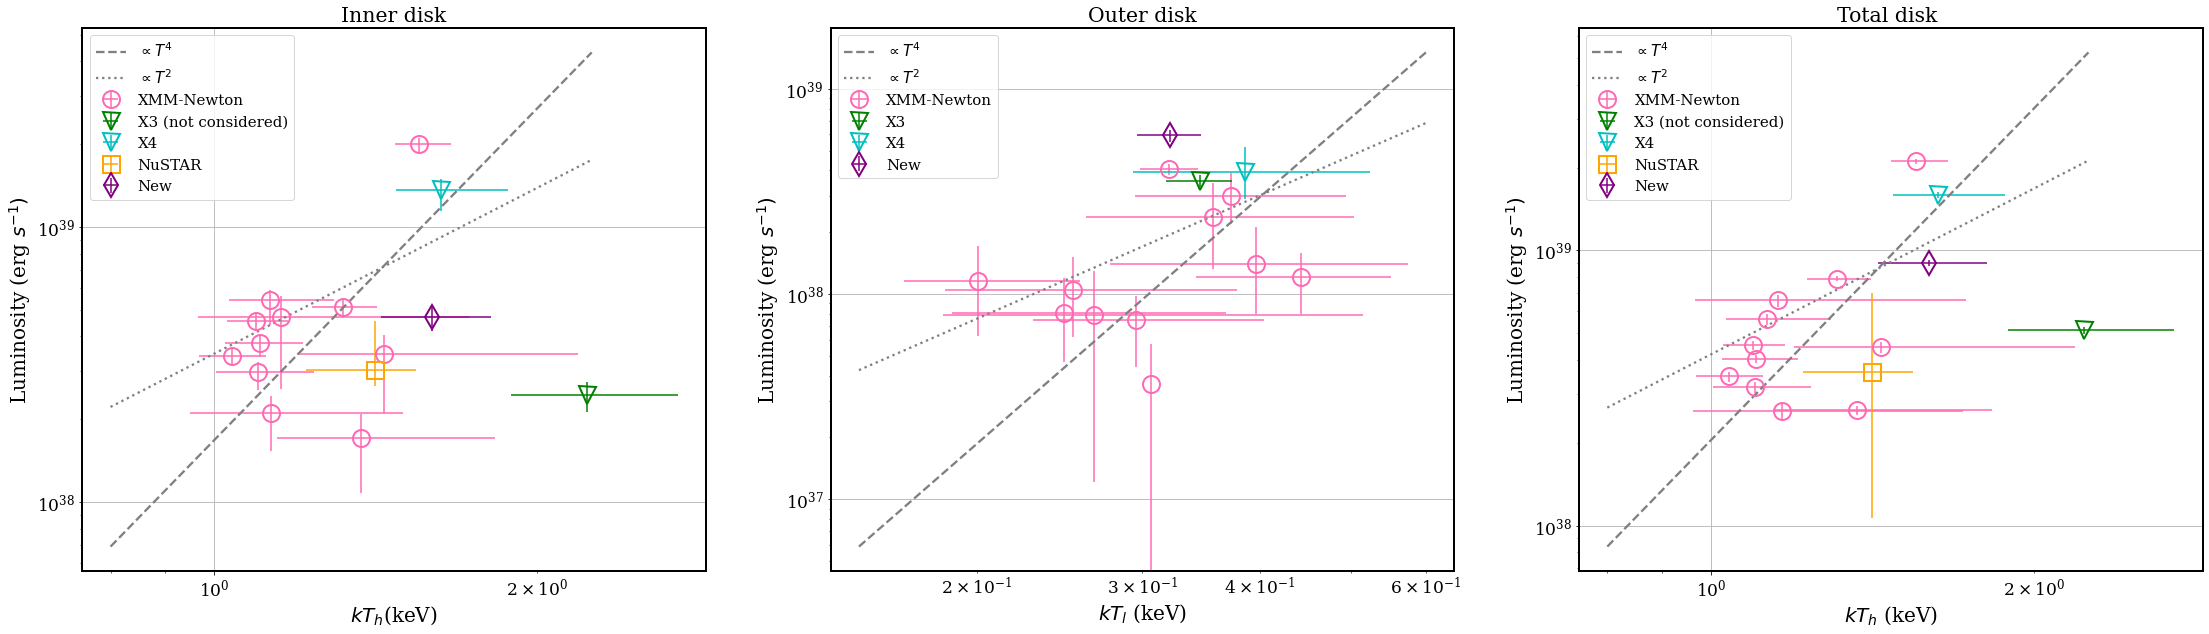

In [131]:

fig, axs = plt.subplots(1,3,figsize=(38,10))

#First
#---------------------------------------------------

#XMM
#axs[0].scatter(XMM_both['Th'],XMM_both['Flux_h'],color='hotpink', label=r'XMM-Newton',marker='o',linewidth=4)
axs[0].errorbar(XMM_both['Th'],XMM_both['Luminosity_h'],xerr=[abs(XMM_both['Th error(-)']).tolist(),abs(XMM_both['Th error(+)']).tolist()],yerr=[abs(XMM_both['Luminosity_h error(-)']).tolist(),abs(XMM_both['Luminosity_h error(+)']).tolist()], fmt='o',color='hotpink',mfc='none',markersize=17,markeredgewidth=2, label=r'XMM-Newton')

#X3
#axs[0].scatter(X3_both['Th'],X3_both['Flux_h'],color='green', label=r'X3 (not considered)',marker='v',linewidth=4)
axs[0].errorbar(X3_both['Th'],X3_both['Luminosity_h'],xerr=[[abs(X3_both['Th error(-)'])],[X3_both['Th error(+)']]],yerr=[[abs(X3_both['Luminosity_h error(-)'])],[abs(X3_both['Luminosity_h error(+)'])]], fmt='v',color='green',mfc='none',markersize=17,markeredgewidth=2, label=r'X3 (not considered)')

#X4
#axs[0].scatter(X4_both['Th'],X4_both['Flux_h'],color='c', label=r'X4',marker='v',linewidth=4)
axs[0].errorbar(X4_both['Th'],X4_both['Luminosity_h'],xerr=[[abs(X4_both['Th error(-)'])],[X4_both['Th error(+)']]],yerr=[[abs(X4_both['Luminosity_h error(-)'])],[abs(X4_both['Luminosity_h error(+)'])]], fmt='v',color='c',mfc='none',markersize=17,markeredgewidth=2, label=r'X4')

#Nustar
#axs[0].scatter(Nu_both['Th'],Nu_both['Flux_h'],color='orange', label=r'NuSTAR',marker='s',linewidth=4)
axs[0].errorbar(Nu_both['Th'],Nu_both['Luminosity_h'],xerr=[[abs(Nu_both['Th error(-)'])],[Nu_both['Th error(+)']]],yerr=[[abs(Nu_both['Luminosity_h error(-)'])],[abs(Nu_both['Luminosity_h error(+)'])]], fmt='s',color='orange',mfc='none',markersize=17,markeredgewidth=2, label=r'NuSTAR')

#Nustar
#axs[0].scatter(Nu_both['Th'],Nu_both['Flux_h'],color='orange', label=r'NuSTAR',marker='s',linewidth=4)
axs[0].errorbar(new_both['Th'],new_both['Luminosity_h'],xerr=[[abs(new_both['Th error(-)'])],[new_both['Th error(+)']]],yerr=[[abs(new_both['Luminosity_h error(-)'])],[abs(new_both['Luminosity_h error(+)'])]], fmt='d',color='purple',mfc='none',markersize=17,markeredgewidth=2, label=r'New')

#plot and fit
axs[0].plot(x1,yfitx3,label=r'$\propto$$T^4$',linestyle='dashed',color='gray',linewidth=2.3)
axs[0].plot(x1,yfitx3_2,label=r'$\propto$$T^2$',linestyle='dotted',color='gray',linewidth=2.3)
axs[0].set_title("Inner disk")
axs[0].set_xlabel(r'$k T_h$(keV)', fontsize=20)
axs[0].set_ylabel(r'Luminosity (erg $s^{-1})$', fontsize=20)
axs[0].legend(loc='upper left',fontsize=15)
axs[0].set_xscale('log')
axs[0].set_yscale('log')
#axs[0].set_ylim(4.2e38,4.85e38)
axs[0].grid()

#Second
#---------------------------------------------------

#XMM
#axs[1].scatter(XMM_both['Tl'],XMM_both['Flux_l'],color='hotpink', label=r'XMM-Newton',marker='o',linewidth=4)
axs[1].errorbar(XMM_both['Tl'],XMM_both['Luminosity_l'],xerr=[abs(XMM_both['Tl error(-)']).tolist(),XMM_both['Tl error(+)'].tolist()],yerr=[abs(XMM_both['Luminosity_l error(-)']).tolist(),abs(XMM_both['Luminosity_l error(+)']).tolist()], fmt='o',color='hotpink',mfc='none',markersize=17,markeredgewidth=2, label=r'XMM-Newton')

#X3
#axs[1].scatter(X3_both['Tl'],X3_both['Flux_l'],color='green', label=r'X3',marker='v',linewidth=4)
axs[1].errorbar(X3_both['Tl'],X3_both['Luminosity_l'],xerr=[[abs(X3_both['Tl error(-)'])],[X3_both['Tl error(+)']]],yerr=[[abs(X3_both['Luminosity_l error(-)'])],[abs(X3_both['Luminosity_l error(+)'])]], fmt='v',color='green',mfc='none',markersize=17,markeredgewidth=2, label=r'X3')

#X4
#axs[1].scatter(X4_both['Tl'],X4_both['Flux_l'],color='c', label=r'X4',marker='v',linewidth=4)
axs[1].errorbar(X4_both['Tl'],X4_both['Luminosity_l'],xerr=[[abs(X4_both['Tl error(-)'])],[X4_both['Tl error(+)']]],yerr=[[abs(X4_both['Luminosity_l error(-)'])],[abs(X4_both['Luminosity_l error(+)'])]], fmt='v',color='c',mfc='none',markersize=17,markeredgewidth=2, label=r'X4')

#Nustar
#axs[1].scatter(Nu_both['Tl'],Nu_both['Flux_l'],color='orange', label=r'NuSTAR (not considered)',marker='s',linewidth=4)
#axs[1].errorbar(Nu_both['Tl'],Nu_both['Luminosity_l'],xerr=[[abs(Nu_both['Tl error(-)'])],[Nu_both['Tl error(+)']]],yerr=[[abs(Nu_both['Luminosity_l error(-)'])],[abs(Nu_both['Luminosity_l error(+)'])]], fmt='s',color='orange',mfc='none',markersize=17,markeredgewidth=2, label=r'NuSTAR (not considered)')

axs[1].errorbar(new_both['Tl'],new_both['Luminosity_l'],xerr=[[abs(new_both['Tl error(-)'])],[new_both['Tl error(+)']]],yerr=[[abs(new_both['Luminosity_l error(-)'])],[abs(new_both['Luminosity_l error(+)'])]], fmt='d',color='purple',mfc='none',markersize=17,markeredgewidth=2, label=r'New')
#plot and fit
axs[1].plot(x2,yfitNu,label=r'$\propto$$T^4$',linestyle='dashed',color='gray',linewidth=2.3)
axs[1].plot(x2,yfitNu2,label=r'$\propto$$T^2$',linestyle='dotted',color='gray',linewidth=2.3)
axs[1].set_title("Outer disk")
axs[1].set_xlabel(r'$k T_l$ (keV)', fontsize=20)
axs[1].set_ylabel(r'Luminosity (erg $s^{-1})$', fontsize=20)
axs[1].legend(loc='upper left',fontsize=15)
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].grid()


#Third
#---------------------------------------------------

#XMM
#axs[2].scatter(XMM_total['T'],XMM_total['Flux'],color='hotpink', label=r'XMM-Newton',marker='o',linewidth=4)
axs[2].errorbar(XMM_total['Th'],XMM_total['Luminosity'],xerr=[abs(XMM_total['Th error(-)']).tolist(),XMM_total['Th error(+)'].tolist()],yerr=[abs(XMM_total['Luminosity error(-)']).tolist(),abs(XMM_total['Luminosity error(+)']).tolist()], fmt='o',color='hotpink',mfc='none',markersize=17,markeredgewidth=2, label=r'XMM-Newton')

#X3
#axs[2].scatter(X3_total['T'],X3_total['Flux'],color='green', label=r'X3',marker='v',linewidth=4)
axs[2].errorbar(X3_both['Th'],X3_total['Luminosity'],xerr=[[abs(X3_both['Th error(-)'])],[X3_both['Th error(+)']]],yerr=[[abs(X3_total['Luminosity error(-)'])],[abs(X3_total['Luminosity error(+)'])]], fmt='v',color='green',mfc='none',markersize=17,markeredgewidth=2, label=r'X3 (not considered)')

#X4
#axs[2].scatter(X4_total['T'],X4_total['Flux'],color='c', label=r'X4',marker='v',linewidth=4)
axs[2].errorbar(X4_both['Th'],X4_total['Luminosity'],xerr=[[abs(X4_both['Th error(-)'])],[X4_both['Th error(+)']]],yerr=[[abs(X4_total['Luminosity error(-)'])],[abs(X4_total['Luminosity error(+)'])]], fmt='v',color='c',mfc='none',markersize=17,markeredgewidth=2, label=r'X4')

#Nustar
#axs[2].scatter(Nu_total['T'],Nu_total['Flux'],color='orange', label=r'NuSTAR',marker='s',linewidth=4)
axs[2].errorbar(Nu_both['Th'],Nu_total['Luminosity'],xerr=[[abs(Nu_both['Th error(-)'])],[Nu_both['Th error(+)']]],yerr=[[abs(Nu_total['Luminosity error(-)'])],[abs(Nu_total['Luminosity error(+)'])]], fmt='s',color='orange',mfc='none',markersize=17,markeredgewidth=2, label=r'NuSTAR')

axs[2].errorbar(new_both['Th'],new_total['Luminosity'],xerr=[[abs(new_both['Th error(-)'])],[new_both['Th error(+)']]],yerr=[[abs(new_total['Luminosity error(-)'])],[abs(new_total['Luminosity error(+)'])]], fmt='d',color='purple',mfc='none',markersize=17,markeredgewidth=2, label=r'New')
#plot and fit
axs[2].plot(x3,yfit5,label=r'$\propto$$T^4$',linestyle='dashed',color='gray',linewidth=2.3)
axs[2].plot(x3,yfit5_2,label=r'$\propto$$T^2$',linestyle='dotted',color='gray',linewidth=2.3)
axs[2].set_title("Total disk ")
axs[2].set_xlabel(r'$k T_h$ (keV)', fontsize=20)
axs[2].set_ylabel(r'Luminosity (erg $s^{-1})$', fontsize=20)
axs[2].legend(loc='upper left',fontsize=15)
axs[2].grid()
axs[2].set_xscale('log')
axs[2].set_yscale('log')


plt.show()

- Neutron star radius calculation

### M= $\frac{L_{Edd}}{(1.38 \cdot 10^{38})}$ $M_{\odot}$

In [58]:
XMM_total["Luminosity"].min()/(1.38*10e38)

0.18875393434113616

## M = 0.12 $M_{\odot}$

In [59]:
XMM_total["Luminosity"].min()

2.6048042939076786e+38

In [60]:
2.60/1.38

1.884057971014493